In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix, hstack
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
df = pd.read_csv('reviews.csv')

In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,27-10-2020 21:24,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,27-10-2020 14:03,"Please note that from checking our records, yo...",27-10-2020 15:05,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,27-10-2020 08:18,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,26-10-2020 13:28,What do you find troublesome about the update?...,26-10-2020 14:58,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,26-10-2020 06:10,NaN,NaN,newest,com.anydo


##### Droping the columns which we do not need.

In [4]:
drop_columns = ['reviewId', 'userName', 'userImage', 'at', 'replyContent', 'repliedAt', 'sortOrder', 'appId']

df = df.drop(columns=drop_columns, axis=1)

In [5]:
df.head(5)

,content,score,thumbsUpCount,reviewCreatedVersion
0,I cannot open the app anymore,1,0,5.4.0.6
1,I have been begging for a refund from this app...,1,0,NaN
2,Very costly for the premium version (approx In...,1,0,NaN
3,"Used to keep me organized, but all the 2020 UP...",1,0,NaN
4,Dan Birthday Oct 28,1,0,5.6.0.7


In [6]:
df.isnull().sum()

content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2162
dtype: int64

In [7]:
df.shape

(12495, 4)

In [8]:
df.dtypes

content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
dtype: object

In [9]:
df['reviewCreatedVersion'].unique()

array(['5.4.0.6', nan, '5.6.0.7', '5.6.0.6', '5.5.0.8', '4.12.0.5',
       '5.6.0.1', '4.10.3.4', '5.5.0.4', '3.4.7.2', '5.2.0.23',
       '4.15.5.4', '4.16.6.2', '5.2.0.9', '4.17.0.2', '4.10.6.1',
       '5.0.0.10', '4.15.9.6', '5.1.2.2', '4.15.9.12', '4.0.11.3',
       '4.15.4.11', '4.17.0.3', '5.1.1.13', '4.16.2.7', '5.0.0.11',
       '4.16.1.6', '4.19.0.6', '2.53', '4.10.2.6', '4.16.5.0', '4.16.4.6',
       '4.16.3.6', '4.10.0.34-wear', '4.16.2.5', '3.4.15.1', '4.15.9.9',
       '3.4.16.1', '5.3.0.5', '3.4.23.5', '3.4.13.20', '4.15.6.9',
       '4.15.8.11', '4.9.1.2', '4.15.3.4', '4.9.5.1', '2.02', '4.15.1.5',
       '16.1.3', '16.1.2', '16.1.1', '16.1.0', '15.7.2', '16.0.0',
       '3.6.0', '15.9.2', '3.5.2', '15.9.0', '15.8.3', '12.5.1', '15.8.2',
       '12.5.4', '15.8.0', '15.7.3', '15.6.0', '15.7.0', '3.3.2',
       '15.0.1', '15.6.1', '12.8.2', '15.5.1', '15.4.0', '15.3.3',
       '15.3.2', '15.2.0', '12.1.1', '3.5.0', '13.4.9', '15.7.1',
       '15.1.0', '15.0.8', '15.0.7', 

##### WE will drop the app version column also.

In [10]:
df = df.drop('reviewCreatedVersion', axis = 1)

In [11]:
df.head()

,content,score,thumbsUpCount
0,I cannot open the app anymore,1,0
1,I have been begging for a refund from this app...,1,0
2,Very costly for the premium version (approx In...,1,0
3,"Used to keep me organized, but all the 2020 UP...",1,0
4,Dan Birthday Oct 28,1,0


In [12]:
df['score'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [13]:
df['thumbsUpCount'].unique()

array([  0,   1,  17,  20,  59,   2,   3,  86,  10,  61,  18,  22,  19,
        29, 127,  13,  30,  21,  81,  16,  11,   5,  60,   7,  24,  12,
         8, 107,   6,   4,  14,  49,  45,  74,   9,  35,  71,  51,  55,
        31,  96,  33,  70, 156,  23, 179, 175,  25, 101, 231, 148, 116,
        39,  37,  75,  83,  65, 115,  38,  27,  80,  92,  40, 270, 184,
       157,  73, 173, 282,  26,  36,  15,  32,  52, 319,  53, 118,  28,
        79, 119,  62, 138,  46,  63,  34,  72,  91,  47,  88,  50, 142,
        44,  41,  43,  54,  48,  90,  84, 178,  77, 290, 121,  89, 100,
        85,  98,  87, 281, 187, 133, 103, 278, 177,  93, 117,  66, 125,
        64, 113,  97,  69,  58, 109,  42, 160,  94, 205, 105,  99,  57,
        78, 136, 143, 124, 241, 162,  68, 397, 339], dtype=int64)

In [14]:
df['thumbsUpCount'].value_counts()

thumbsUpCount
0      8731
1      1381
2       552
3       314
4       196
       ... 
85        1
98        1
87        1
281       1
339       1
Name: count, Length: 139, dtype: int64

In [15]:
df['score'].value_counts()

score
5    2879
4    2775
1    2506
2    2344
3    1991
Name: count, dtype: int64

In [16]:
df['thumbsUpCount'].describe()

count    12495.000000
mean         3.047459
std         14.303903
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        397.000000
Name: thumbsUpCount, dtype: float64

###### Now we have deal with only content coulmn. We will remove the punc and stops words first.

In [17]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [18]:
message = df['content'][0]

In [19]:
message

'I cannot open the app anymore'

In [20]:
nonpunc = [c for c in message if c not in string.punctuation]

In [21]:
nonpunc

['I',
 ' ',
 'c',
 'a',
 'n',
 'n',
 'o',
 't',
 ' ',
 'o',
 'p',
 'e',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'a',
 'p',
 'p',
 ' ',
 'a',
 'n',
 'y',
 'm',
 'o',
 'r',
 'e']

In [22]:
nonpunc = ''.join(nonpunc)

In [23]:
nonpunc

'I cannot open the app anymore'

In [24]:
stopwords = stopwords.words('English')

In [25]:
nonpunc = nonpunc.split()

In [26]:
nonpunc

['I', 'cannot', 'open', 'the', 'app', 'anymore']

In [27]:
clean_message = [word for word in nonpunc if word.lower() not in stopwords]

In [28]:
clean_message

['cannot', 'open', 'app', 'anymore']

##### Lets do all this in our whole databse

In [32]:
def text_process(message):
    '''
    1. Remove non
    2. join them
    3. split
    4. remove stopword
    '''
    nonpunc = [c for c in message if c not in string.punctuation]
    nonpunc = ''.join(nonpunc)
    nonpunc = nonpunc.split()

    return [word for word in nonpunc if word.lower() not in stopwords]

In [33]:
df.head()

,content,score,thumbsUpCount
0,I cannot open the app anymore,1,0
1,I have been begging for a refund from this app...,1,0
2,Very costly for the premium version (approx In...,1,0
3,"Used to keep me organized, but all the 2020 UP...",1,0
4,Dan Birthday Oct 28,1,0


In [34]:
df['content'].apply(text_process)

0                             [cannot, open, app, anymore]
1          [begging, refund, app, month, nobody, replying]
2        [costly, premium, version, approx, Indian, Rup...
3        [Used, keep, organized, 2020, UPDATES, made, m...
4                                 [Dan, Birthday, Oct, 28]
                               ...                        
12490    [really, like, planner, helps, achieve, tasks,...
12491                                                 [😁😁]
12492                            [useful, apps, must, try]
12493    [Would, pay, even, additions, updates, Absolut...
12494                                        [Sooow, good]
Name: content, Length: 12495, dtype: object

##### Now let us understand the vertorizer

In [35]:
message = df['content'][0]

In [36]:
message

'I cannot open the app anymore'

In [37]:
vectorizer = TfidfVectorizer(analyzer=text_process, max_features=500)

In [38]:
X = vectorizer.fit_transform(df['content'])

In [39]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 103548 stored elements and shape (12495, 500)>
  Coords	Values
  (0, 99)	0.5651490896844238
  (0, 312)	0.5207287486764381
  (0, 71)	0.198512976567532
  (0, 69)	0.6083096866440947
  (1, 71)	0.3255773609287917
  (1, 288)	0.945515405506776
  (2, 71)	0.21572084135751116
  (2, 339)	0.4714102773784137
  (2, 470)	0.4333225993166515
  (2, 496)	0.31247847231627834
  (2, 150)	0.3425294263736816
  (2, 463)	0.18321283303352262
  (2, 30)	0.3342528760884831
  (2, 255)	0.22801965991398554
  (2, 175)	0.2615610000524105
  (2, 87)	0.25059956284314944
  (3, 43)	0.31857326295606775
  (3, 238)	0.4672467053417834
  (3, 317)	0.29421339373965943
  (3, 269)	0.2719723944003917
  (3, 431)	0.23323702289720552
  (3, 452)	0.3154443879620354
  (3, 480)	0.23453592252927533
  (3, 178)	0.29421339373965943
  (3, 296)	0.212318837488275
  :	:
  (12485, 206)	1.0
  (12486, 71)	1.0
  (12488, 302)	0.514528240249598
  (12488, 467)	0.5540113650329569
  (12488, 188)	0

In [40]:
df.head()

,content,score,thumbsUpCount
0,I cannot open the app anymore,1,0
1,I have been begging for a refund from this app...,1,0
2,Very costly for the premium version (approx In...,1,0
3,"Used to keep me organized, but all the 2020 UP...",1,0
4,Dan Birthday Oct 28,1,0


In [41]:
df.dtypes

content          object
score             int64
thumbsUpCount     int64
dtype: object

In [43]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 103548 stored elements and shape (12495, 500)>

##### We alos want use the other two column with our X but we cnnot use this directly

In [45]:
scaler = StandardScaler()

In [47]:
numeric_data = df[['score', 'thumbsUpCount']]

In [48]:
numeric_data

,score,thumbsUpCount
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
12490,5,0
12491,5,0
12492,5,0
12493,5,0


In [49]:
numric_data = scaler.fit_transform(numeric_data)

In [50]:
numeric_data

,score,thumbsUpCount
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
12490,5,0
12491,5,0
12492,5,0
12493,5,0


In [52]:
numeric_data = csr_matrix(numeric_data)

In [53]:
numeric_data

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 16259 stored elements and shape (12495, 2)>

In [54]:
combined_data = hstack([X, numeric_data])

In [55]:
combined_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 119807 stored elements and shape (12495, 502)>

##### Now let do clustering

In [57]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [60]:
kmeans.fit(combined_data)

clusters = kmeans.predict(combined_data)

In [61]:
clusters

array([4, 4, 4, ..., 0, 0, 0])

In [62]:
df['cluster'] = clusters

In [64]:
df.head()

,content,score,thumbsUpCount,cluster
0,I cannot open the app anymore,1,0,4
1,I have been begging for a refund from this app...,1,0,4
2,Very costly for the premium version (approx In...,1,0,4
3,"Used to keep me organized, but all the 2020 UP...",1,0,4
4,Dan Birthday Oct 28,1,0,4


In [65]:
df.groupby('cluster')[['score', 'thumbsUpCount']].mean()

,score,thumbsUpCount
cluster,,
0,3.795015,0.132440
1,2.817204,106.301075
2,3.000000,284.818182
3,2.787654,33.222222
4,1.691739,2.686384


In [67]:
df.head()

,content,score,thumbsUpCount,cluster
0,I cannot open the app anymore,1,0,4
1,I have been begging for a refund from this app...,1,0,4
2,Very costly for the premium version (approx In...,1,0,4
3,"Used to keep me organized, but all the 2020 UP...",1,0,4
4,Dan Birthday Oct 28,1,0,4


In [69]:
pca = PCA(n_components=2, random_state=42)

In [70]:
X_dense = combined_data.toarray()

In [71]:
X_pca = pca.fit_transform(X_dense)

In [73]:
X_pca

array([[-3.03728349, -2.10989807],
       [-3.03735351, -2.10710181],
       [-3.03716895, -2.11083947],
       ...,
       [-3.05671846,  1.89070664],
       [-3.05658373,  1.88836975],
       [-3.05697736,  1.89483952]])

In [81]:
X_pca[:, 0]

array([-3.03728349, -3.03735351, -3.03716895, ..., -3.05671846,
       -3.05658373, -3.05697736])

In [86]:
df1 = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'cluster':df['cluster'].astype(str)
})

<Axes: xlabel='PC1', ylabel='PC2'>

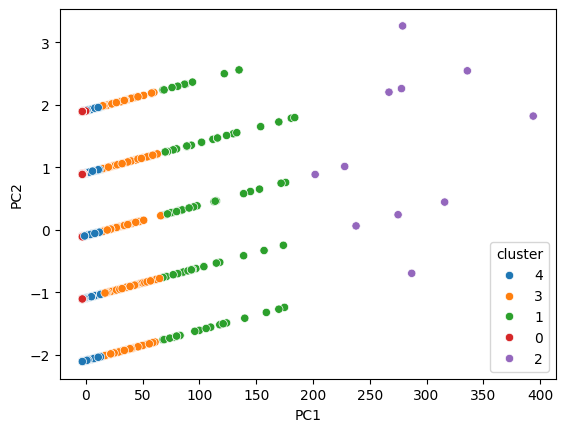

In [87]:
sns.scatterplot(data=df1, x='PC1', y='PC2', hue = 'cluster'